In [1]:
import pandas as pd
import tensorflow as tf
from tensorflow.keras import backend as K
import numpy as np
import matplotlib.pyplot as plt

def plot_series(time, series, label, format="-", start=0, end=None):
    plt.plot(time[start:end], series[start:end], format, label=label)
    plt.xlabel("Time")
    plt.ylabel("#Sunplots")
    plt.grid(True)

# Import Data

In [2]:
df = pd.read_csv("hlsp_deep47tuc_hst_acs_47tuc_f606w-f814w_v1_catalog.txt", sep='\s+')

In [3]:
df.corr()

,ID,X,Y,F606W,error,F814W,error.1,Chi,Sharp
ID,1.000000,0.016550,0.230450,-0.498692,-0.110443,-0.458595,-0.105819,-0.224421,0.009418
X,0.016550,1.000000,0.053451,-0.096873,-0.081905,-0.103088,-0.075036,0.036013,0.044140
Y,0.230450,0.053451,1.000000,-0.154213,-0.112309,-0.162024,-0.103044,0.043035,0.051405
F606W,-0.498692,-0.096873,-0.154213,1.000000,0.560325,0.981704,0.516773,0.041261,-0.156516
error,-0.110443,-0.081905,-0.112309,0.560325,1.000000,0.565141,0.800688,0.249743,-0.552203
F814W,-0.458595,-0.103088,-0.162024,0.981704,0.565141,1.000000,0.572660,0.044171,-0.144396
error.1,-0.105819,-0.075036,-0.103044,0.516773,0.800688,0.572660,1.000000,0.276366,-0.514196
Chi,-0.224421,0.036013,0.043035,0.041261,0.249743,0.044171,0.276366,1.000000,0.035426
Sharp,0.009418,0.044140,0.051405,-0.156516,-0.552203,-0.144396,-0.514196,0.035426,1.000000


Text(0.5, 1.0, 'Correlation between different fearures')

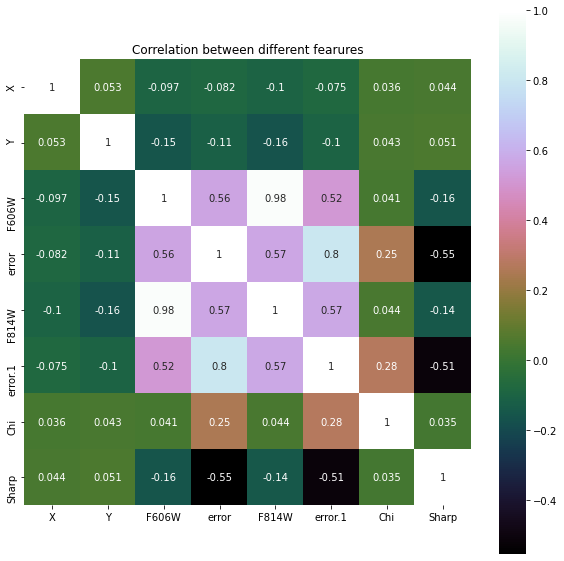

In [6]:
import seaborn as sns

correlation = df[df.columns[1:]].corr()
plt.figure(figsize=(10,10))
sns.heatmap(correlation, vmax=1, square=True,annot=True,cmap='cubehelix')

plt.title('Correlation between different fearures')

In [4]:
from sklearn.preprocessing import MinMaxScaler

X_std = MinMaxScaler().fit_transform(df[df.columns[1:]])
cov_mat = np.cov(X_std.T)
eig_vals, eig_vecs = np.linalg.eig(cov_mat)
eig_vals/eig_vals.sum()

array([0.39695717, 0.24214213, 0.22504599, 0.09502065, 0.02118135,
       0.01168484, 0.00175219, 0.00621568])

In [5]:
df[df.columns[1:]].T

,0,1,2,3,4,5,6,7,8,9,...,51470,51471,51472,51473,51474,51475,51476,51477,51478,51479
X,4462.9470,5002.4860,5003.5740,4448.4930,5040.7170,4559.9330,4384.7950,4402.9280,5043.7150,4953.1690,...,5309.2650,3532.3390,5666.0210,7059.1260,4945.8700,3417.4670,3435.0310,3594.5670,5155.0930,5658.6040
Y,140.8590,186.1380,195.4210,207.4170,224.3660,244.2790,247.0930,271.7920,272.6090,280.2860,...,10390.2710,10391.6400,10392.4900,10393.4200,10393.9200,10394.3190,10396.7300,10397.3400,10397.9200,10399.7200
F606W,28.1970,20.8430,27.0140,30.1930,28.9350,24.7130,28.3990,28.8150,20.4110,22.9870,...,20.3790,29.4270,28.8380,23.4210,26.0780,26.8950,23.1520,27.2090,28.2350,24.8980
error,0.1036,0.0552,0.2194,0.3641,0.1669,0.0574,0.1016,0.1858,0.0585,0.0532,...,0.0435,0.1816,0.1317,0.0634,0.2676,0.0783,0.0504,0.0815,0.0984,0.0349
F814W,27.1270,19.8150,26.0680,28.2700,28.9410,24.1850,27.4300,28.0730,19.5390,22.4850,...,19.4570,28.1010,28.5430,23.1800,24.0390,25.6020,22.6620,27.1300,26.4770,24.1980
error.1,0.1068,0.0661,0.1349,0.1636,0.2464,0.0687,0.1490,0.1702,0.0550,0.0635,...,0.0530,0.2309,0.2226,0.0786,0.1971,0.1050,0.0505,0.0900,0.0937,0.0752
Chi,6.1060,10.6900,10.6510,4.0590,4.2740,10.2280,5.9905,5.2020,10.1610,10.1570,...,8.4000,4.8450,3.0340,10.3280,30.5300,9.5080,8.8230,4.3110,6.1730,8.4770
Sharp,0.7310,0.4000,0.1940,-1.9585,-0.7720,-0.0700,0.8630,-0.5910,0.6110,0.5230,...,0.2770,-0.8530,-0.4510,0.2080,-0.8170,1.3140,-0.1330,0.9355,0.3190,0.7300


In [2]:
df = pd.read_csv("hlsp_deep47tuc_hst_acs_47tuc_f606w-f814w_v1_catalog.txt", sep='\s+')
df.drop(columns=['X', 'Y', 'error', 'error.1', 'ID'], inplace=True)

x = df.F606W - df.F814W
y = 16.5 + 4. * x

df.loc[df.F814W >= y, 'Groups'] = 1
df.loc[df.F814W < y, 'Groups'] = 0
df

,F606W,F814W,Chi,Sharp,Groups
0,28.197,27.127,6.106,0.7310,1.0
1,20.843,19.815,10.690,0.4000,0.0
2,27.014,26.068,10.651,0.1940,1.0
3,30.193,28.270,4.059,-1.9585,1.0
4,28.935,28.941,4.274,-0.7720,1.0
...,...,...,...,...,...
51475,26.895,25.602,9.508,1.3140,1.0
51476,23.152,22.662,8.823,-0.1330,1.0
51477,27.209,27.130,4.311,0.9355,1.0
51478,28.235,26.477,6.173,0.3190,1.0


## Manipulating Data

In [6]:
X = df[df.columns[:-1]].to_numpy()
y = df[df.columns[-1]].to_numpy()

In [7]:
from tensorflow.keras.utils import to_categorical

y = to_categorical(y, num_classes=2)
#y = labels.reshape(-1, 3)
y.shape

(51480, 2)

## Standardizing Data

In [9]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X = scaler.fit(X).transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2)

# Neural Network

## Creating Neural Network

In [10]:
tf.keras.backend.clear_session()
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(len(df.columns[:-1]), input_dim=len(df.columns[:-1]), activation='relu'),
    tf.keras.layers.Dense(32, activation="relu"),
    tf.keras.layers.Dense(32, activation="relu"),
    tf.keras.layers.Dense(2, activation="softmax"),
])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 4)                 20        
_________________________________________________________________
dense_1 (Dense)              (None, 32)                160       
_________________________________________________________________
dense_2 (Dense)              (None, 32)                1056      
_________________________________________________________________
dense_3 (Dense)              (None, 2)                 66        
Total params: 1,302
Trainable params: 1,302
Non-trainable params: 0
_________________________________________________________________


## Compiling Model and Fitting to Data

In [11]:
optimizer = tf.keras.optimizers.Adam(learning_rate=5E-4)
model.compile(optimizer='adam',
              loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
              metrics=['accuracy'])


# metrics=['mae']
# metrics=[tf.keras.metrics.RootMeanSquaredError()]

In [12]:
%%time
stopping = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=4, mode='auto')
history = model.fit(X_train, y_train, epochs=100, validation_data=(X_val, y_val), callbacks=stopping)

Epoch 1/100
1030/1030 [==============================] - 1s 1ms/step - loss: 0.5615 - accuracy: 0.9103 - val_loss: 0.5368 - val_accuracy: 0.9366
Epoch 2/100
1030/1030 [==============================] - 1s 945us/step - loss: 0.5229 - accuracy: 0.9666 - val_loss: 0.5096 - val_accuracy: 0.9928
Epoch 3/100
1030/1030 [==============================] - 1s 945us/step - loss: 0.5078 - accuracy: 0.9937 - val_loss: 0.5062 - val_accuracy: 0.9950
Epoch 4/100
1030/1030 [==============================] - 1s 941us/step - loss: 0.5060 - accuracy: 0.9955 - val_loss: 0.5058 - val_accuracy: 0.9950
Epoch 5/100
1030/1030 [==============================] - 1s 940us/step - loss: 0.5053 - accuracy: 0.9967 - val_loss: 0.5051 - val_accuracy: 0.9965
Epoch 6/100
1030/1030 [==============================] - 1s 971us/step - loss: 0.5049 - accuracy: 0.9970 - val_loss: 0.5049 - val_accuracy: 0.9985
Epoch 7/100
1030/1030 [==============================] - 1s 954us/step - loss: 0.5048 - accuracy: 0.9974 - val_loss: 0.5

In [13]:
_, accuracy = model.evaluate(X_val, y_val, verbose=0)

In [14]:
accuracy

0.9970863461494446

In [15]:
prediction = model.predict(X_test)

In [17]:
prediction.argmax(axis=1)

array([0, 1, 1, ..., 0, 1, 1], dtype=int64)

In [18]:
pred = prediction.argmax(axis=1)

In [35]:
len(pred)

10296

In [24]:
(y_test.argmax(axis=1) == pred).sum()

10260

In [27]:
datas = scaler.inverse_transform(X_test)
color = datas[:, 0] - datas[:, 1]

(33.0, 12.5)

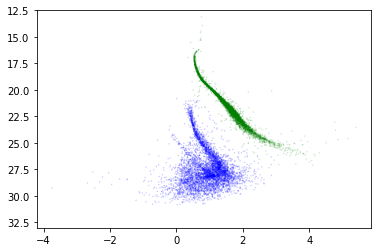

In [36]:
from matplotlib.colors import ListedColormap
plt.scatter(color, datas[:, 1], c=pred, alpha=.3, s=0.1, cmap=ListedColormap(['g', 'b'])) # g = 0, b = 1
plt.ylim(33, 12.5)

(33.0, 12.5)

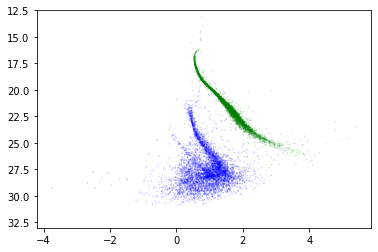

In [31]:
plt.scatter(color, datas[:, 1], c=y_test.argmax(axis=1), alpha=.3, s=0.1, cmap=ListedColormap(['g', 'b']))
plt.ylim(33, 12.5)